Five Classes Vertical Translation. Bidimensional.
100 batches of 228 instances



METHOD: Static lp as classifier


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Execution time:  0.9406210604953835
Average error: 54.5097
Average macro-F1: 0.35370247958636375
Average micro-F1: 0.4518
Average Accuracy:  45.4903
Standard Deviation:  19.4057906025
Variance:  376.58470891


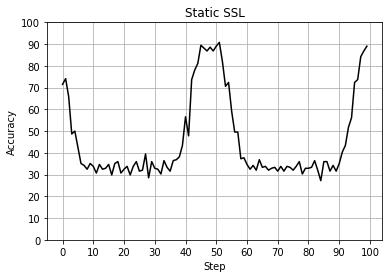

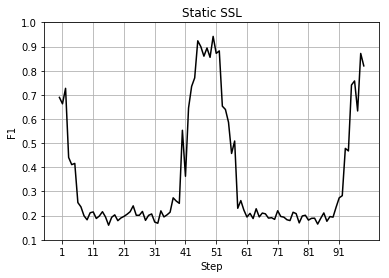

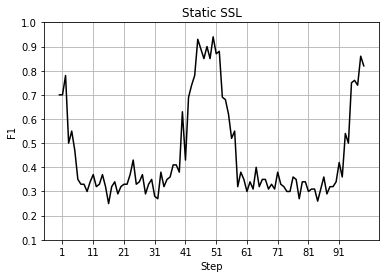




METHOD: Sliding lp as classifier
Execution time:  0.802752077925105
Average error: 60.9699
Average macro-F1: 0.18125828815844566
Average micro-F1: 0.39339999999999997
Average Accuracy:  39.0301
Standard Deviation:  10.6580424558
Variance:  113.59386899


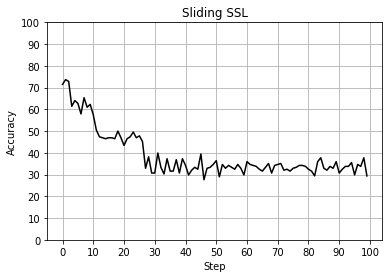

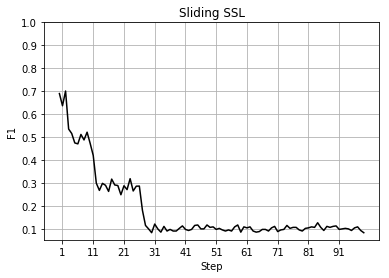

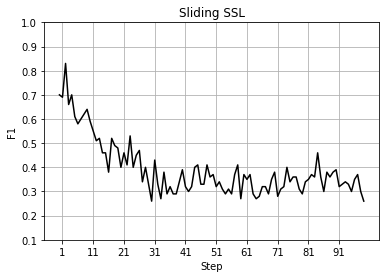




METHOD: Incremental lp as classifier
Execution time:  20.50996048989215
Average error: 52.0311
Average macro-F1: 0.37077549938921206
Average micro-F1: 0.47489999999999993
Average Accuracy:  47.9689
Standard Deviation:  18.2714117076
Variance:  333.84448579


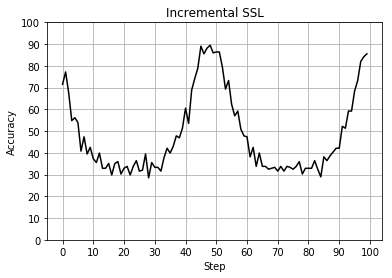

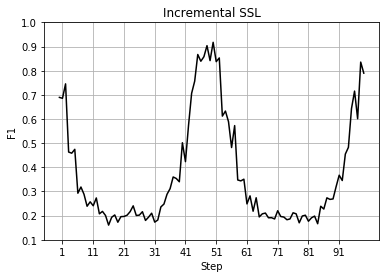

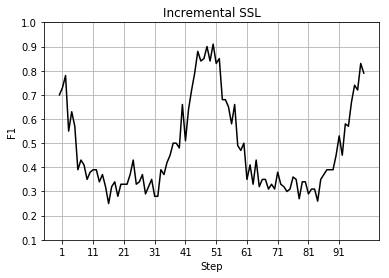




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  1.9774273669422762
Average error: 24.1097
Average macro-F1: 0.7297430518795978
Average micro-F1: 0.7654
Average Accuracy:  75.8903
Standard Deviation:  13.0720224491
Variance:  170.87777091


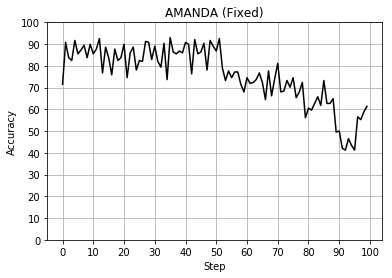

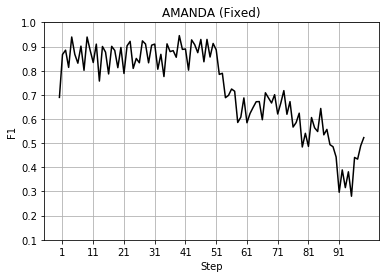

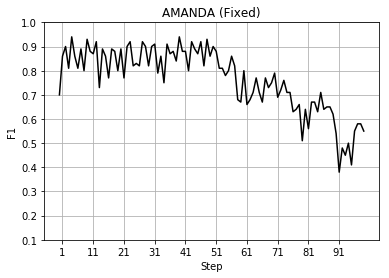




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  1.3728215811075266
Average error: 57.0218
Average macro-F1: 0.3802173431003783
Average micro-F1: 0.4332999999999999
Average Accuracy:  42.9782
Standard Deviation:  25.8919362497
Variance:  670.39236276


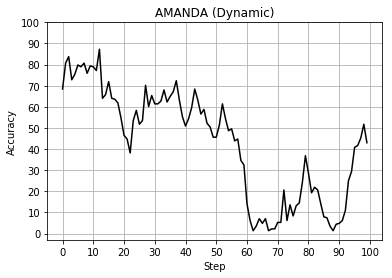

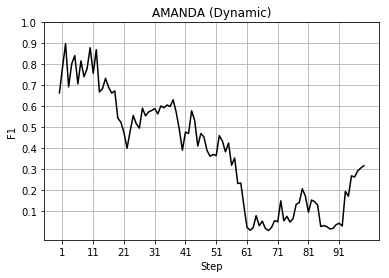

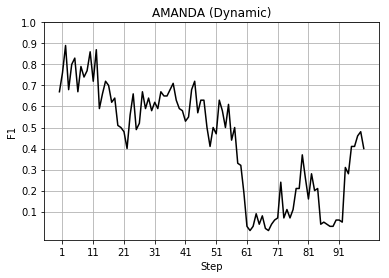




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  79.1260775798212
Average error: 65.5044
Average macro-F1: 0.23857622527411046
Average micro-F1: 0.35239999999999994
Average Accuracy:  34.4956
Standard Deviation:  19.8307909232
Variance:  393.26026864


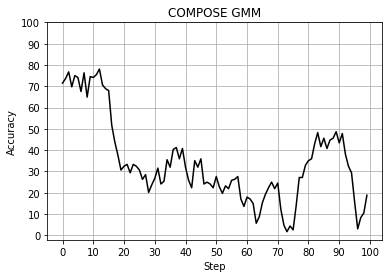

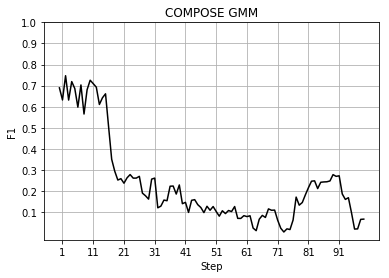

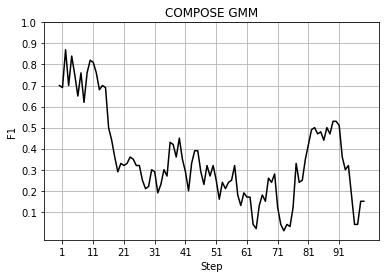




Method: Level IW
Execution time:  79.1260775798212
Average macro-F1: 0.17670355406208735
Average micro-F1: 0.21710000000000002
Average Accuracy:  40.820163
Standard Deviation:  12.8354110187
Variance:  164.747776018


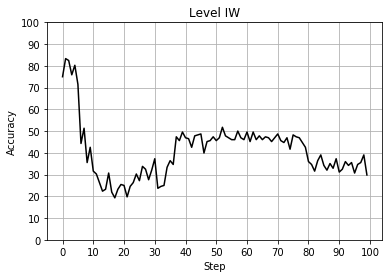

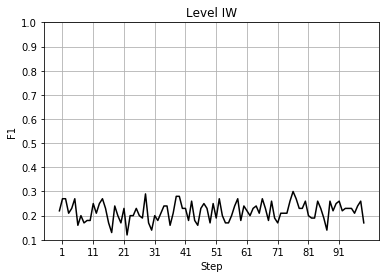

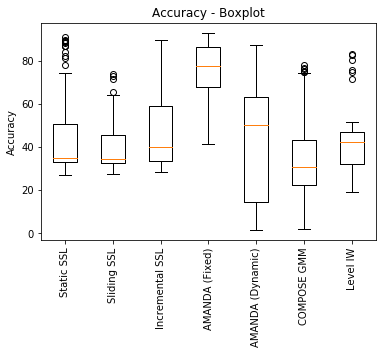

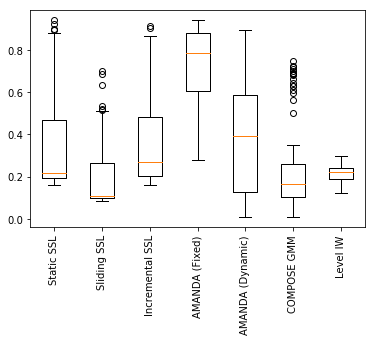

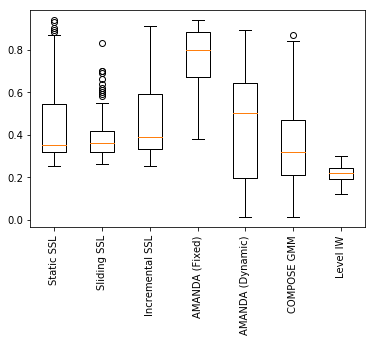

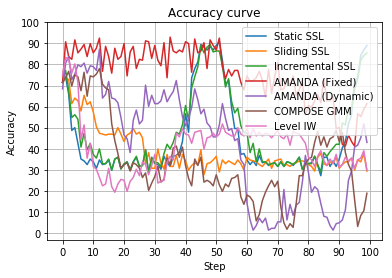

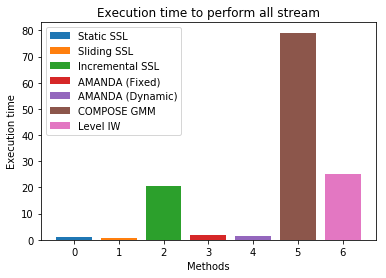

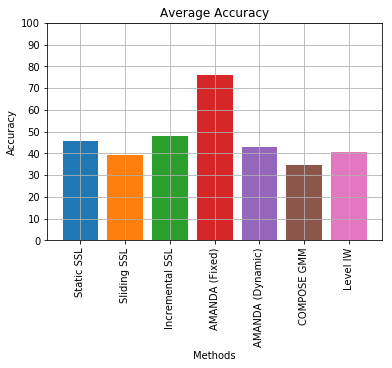

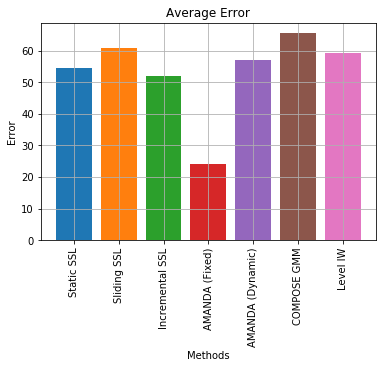

Error reduction: -14.2012692816
Error reduction: 5.44863410441
Error reduction: 66.8274335408
Error reduction: -5.52227617756
Error reduction: -24.1693284063
Error reduction: -10.2662259866


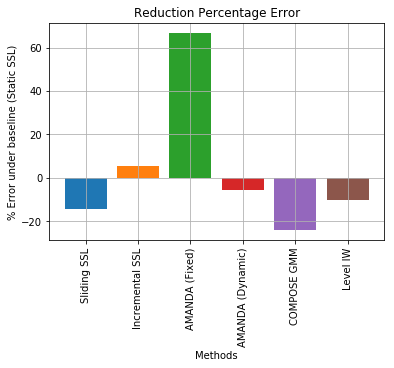

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load5CVT(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 8, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 8, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 8, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 8, 0.85, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 9, None, "kde", 'knn')

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 8)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '5CVT', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()